In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sir_spreading  import SIR_classical
from sir_spreading import SIR_threshold
from sir_spreading import SIR_cascade


In [2]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [3]:
# Specify the number of random nodes you want
num_random_nodes = 10  # You can change this number as needed

#select one raqndom node:
random_node = random.choice([i for i in range(G.number_of_nodes())])

# Select multiple random nodes
random_nodes = random.sample(sorted(G.nodes()), num_random_nodes)

random_nodes

['287', '479', '216', '536', '1187', '635', '756', '1227', '454', '32']

In [4]:
def get_starting_nodes(G, method,n):  
    if method == 'degree':
        # Calculate degree centrality
        node_dict = nx.degree_centrality(G)
    
    elif method  == 'closeness':
        node_dict = nx.closeness_centrality(G)

    elif method == 'betweenness':
        node_dict = nx.betweenness_centrality(G)
    
    elif method  == 'eigenvector':
        node_dict = nx.eigenvector_centrality(G)
    
    elif method == 'katz':
        node_dict = nx.katz_centrality(G)
    
    elif method == 'harmonic':
        node_dict = nx.harmonic_centrality(G)
    
    
    # Sort the dictionary items in descending order based on centrality values
    sorted_nodes = sorted(node_dict.items(), key=lambda x: x[1], reverse=True)
        
    top_10 = sorted_nodes[:n]
        
    # Extract only the node IDs from the sorted list
    top_node_ids = [node for node, _ in top_10]


    # Display the node IDs
    #print(top_10_node_ids)
    #print(top_10)
    return top_node_ids


In [5]:
get_starting_nodes(G, 'closeness',10)

['17', '41', '19', '49', '38', '537', '13', '1', '12', '534']

In [6]:
# Read the graph from the edgelist
Gc = nx.read_edgelist('M1/edges.csv', delimiter=',')
Gcc = nx.read_edgelist('M1/edges.csv', delimiter=',')

nodes_to_remove_10 = get_starting_nodes(Gc,'closeness',10)
nodes_to_remove_100 = get_starting_nodes(Gcc,'closeness',100)

# Remove nodes from the graph
Gc.remove_nodes_from(nodes_to_remove_10)
Gcc.remove_nodes_from(nodes_to_remove_100)


# Create a new graph without the specified nodes
Gc_10 = Gc.subgraph([node for node in Gc.nodes if node not in nodes_to_remove_10])
Gc_100 = Gcc.subgraph([node for node in Gcc.nodes if node not in nodes_to_remove_100])





In [8]:
[len(c) for c in sorted(nx.connected_components(Gc_100), key=len, reverse=True)]


In [16]:
classical_closeness_immune_10 = SIR_classical(Gc_10, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(Gc_10, 'closeness',10) )
classical_closeness_immune_100 = SIR_classical(Gc_100, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(Gc_100, 'closeness',10) )
classical_closeness = SIR_classical(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'closeness',10) )


threshold_closeness_immune_10 = SIR_threshold(Gc_10, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(Gc_10, 'closeness',10) )
threshold_closeness_immune_100 = SIR_threshold(Gc_100, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(Gc_100, 'closeness',10) )
threshold_closeness = SIR_threshold(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'closeness',10) )


cascade_closeness_immune_10 = SIR_cascade(Gc_10, beta=0.05, gamma=3, starting_nodes=get_starting_nodes(Gc_10, 'closeness', 10))
cascade_closeness_immune_100 = SIR_cascade(Gc_100, beta=0.05, gamma=3, starting_nodes=get_starting_nodes(Gc_100, 'closeness', 10))
cascade_closeness = SIR_cascade(G, beta=0.05, gamma=3, starting_nodes=get_starting_nodes(G, 'closeness', 10))



classical_immunity = [
    classical_closeness_immune_10,
    classical_closeness_immune_100,
    classical_closeness,
    
]
threshold_immunity = [
    threshold_closeness_immune_10,
    threshold_closeness_immune_100,
    threshold_closeness
]
cascade_immunity = [
    cascade_closeness_immune_10,
    cascade_closeness_immune_100,
    cascade_closeness
]







In [17]:
def plot_immune(data_frames):
    methods = ['10 immunisation','100 immunisation','no immunisation']
    # Define a custom color palette
    custom_palette = ['blue', 'green','purple']  # Add more colors if needed
    # Create a graph with the different df's
    for i, df_data in enumerate(data_frames):
        sns.lineplot(data = df_data, x='t', y='IR', label=f'Method {methods[i]}', color = custom_palette[i])   
    plt.title('Cascade')

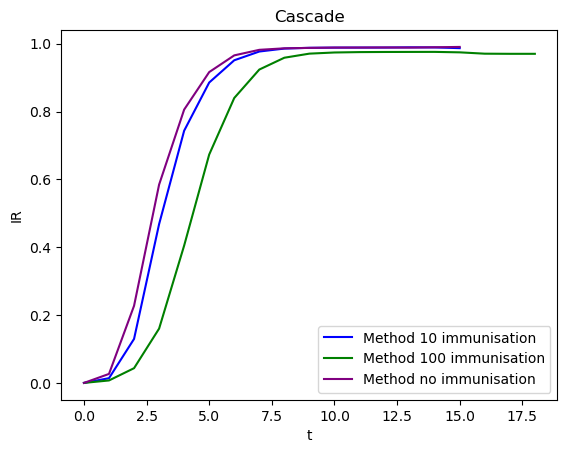

In [18]:
plot_immune(classical_immunity)
plt.savefig('plot_classical_immunity.png') 

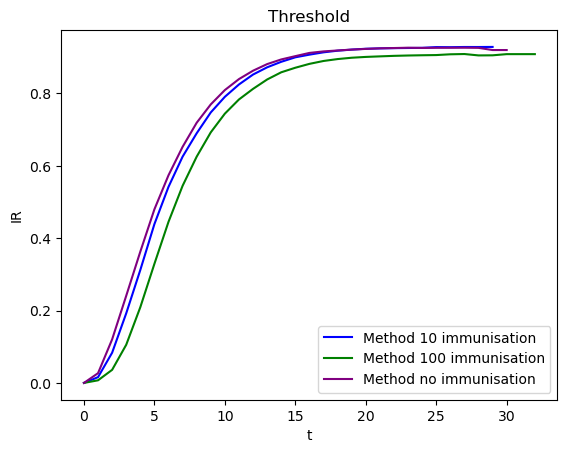

In [87]:
plot_immune(threshold_immunity)
#plt.savefig('plot_threshold_immunity.png') 

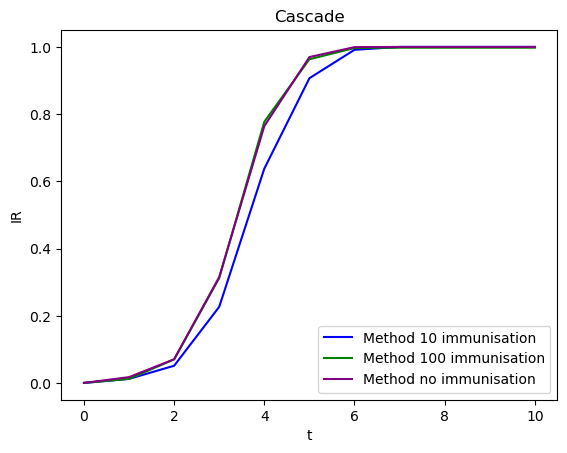

In [19]:
plot_immune(cascade_immunity)
plt.savefig('plot_cascade_immunity.png') 